In [1]:
import requests
import json
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

In [2]:
# Auhtorization details

client_id = '9ba02520f54e4bfea32879e7eb5f686c'
client_secret = 'fffdd7e889f44659ac392a9319ea6df8'

In [3]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

In [4]:
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
name = 'Four Tet'

In [6]:
result = sp.search(name)

In [7]:
result['tracks']['items'][0]['artists']

[{u'external_urls': {u'spotify': u'https://open.spotify.com/artist/7Eu1txygG6nJttLHbZdQOh'},
  u'href': u'https://api.spotify.com/v1/artists/7Eu1txygG6nJttLHbZdQOh',
  u'id': u'7Eu1txygG6nJttLHbZdQOh',
  u'name': u'Four Tet',
  u'type': u'artist',
  u'uri': u'spotify:artist:7Eu1txygG6nJttLHbZdQOh'}]

In [8]:
artist_uri = result['tracks']['items'][0]['artists'][0]['uri']

In [9]:
sp_albums = sp.artist_albums(artist_uri, album_type='album')

In [10]:
album_names = []
album_uris = []

for i in range(len(sp_albums['items'])):
    album_names.append(sp_albums['items'][i]['name'])
    album_uris.append(sp_albums['items'][i]['uri'])

In [11]:
album_names

[u'Sixteen Oceans',
 u'New Energy',
 u'Morning / Evening',
 u'Beautiful Rewind',
 u'Pink',
 u'There Is Love in You (Expanded Edition)',
 u'Ringer',
 u'Everything Ecstatic Part 2',
 u'Everything Ecstatic',
 u'Everything Ecstatic',
 u'Everything Ecstatic',
 u'Rounds',
 u'Rounds',
 u'Pause',
 u'Pause']

In [12]:
album_uris

[u'spotify:album:5gIa8hTQGPwVeNYjDwrraZ',
 u'spotify:album:74r6JJ97ipO0CREXP9PMqZ',
 u'spotify:album:43QSgia2W3hFNjE8p8TSUR',
 u'spotify:album:7gN7gWms3Uz0GLLtLYHybk',
 u'spotify:album:4AQJGcPp7SpT1xNLWrfYuz',
 u'spotify:album:6XoxeeeyZgzqUMzUBUSDG9',
 u'spotify:album:730JtZlgZBwrLjTwAwmG6P',
 u'spotify:album:1jiFeEPxiQcp34FtcHjdSL',
 u'spotify:album:2BKXRpAaq7jZStXo6A10qK',
 u'spotify:album:74piIIouAxxcGogHcVAKlE',
 u'spotify:album:6WirWbw23J7RujBk1krZWP',
 u'spotify:album:1ehwJGN59cUxk9LuHRHJdv',
 u'spotify:album:2H49BEjjzWluWjmy2k9tdQ',
 u'spotify:album:4AMMuff41p2a4lNeIuziDc',
 u'spotify:album:5JgSf8r0GWeiK2hFNUHZDj']

In [13]:


def album_songs(uri):
    album = uri
    
    spotify_albums[album] = {}
    
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] #create empty list
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    
    tracks = sp.album_tracks(album)
    
    for n in range(len(tracks['items'])): #for each song track
        spotify_albums[album]['album'].append(album_names[album_count]) #append album name tracked via album_count
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [14]:
spotify_albums = {}

album_count = 0

for i in album_uris:
    album_songs(i)
    print("Album " + str(album_names[album_count]) + " songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Album Sixteen Oceans songs has been added to spotify_albums dictionary
Album New Energy songs has been added to spotify_albums dictionary
Album Morning / Evening songs has been added to spotify_albums dictionary
Album Beautiful Rewind songs has been added to spotify_albums dictionary
Album Pink songs has been added to spotify_albums dictionary
Album There Is Love in You (Expanded Edition) songs has been added to spotify_albums dictionary
Album Ringer songs has been added to spotify_albums dictionary
Album Everything Ecstatic Part 2 songs has been added to spotify_albums dictionary
Album Everything Ecstatic songs has been added to spotify_albums dictionary
Album Everything Ecstatic songs has been added to spotify_albums dictionary
Album Everything Ecstatic songs has been added to spotify_albums dictionary
Album Rounds songs has been added to spotify_albums dictionary
Album Rounds songs has been added to spotify_albums dictionary
Album Pause songs has been added to spotify_albums diction

In [15]:
spotify_albums

{u'spotify:album:1ehwJGN59cUxk9LuHRHJdv': {'album': [u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds',
   u'Rounds'],
  'id': [u'6NjDSYmK9gIMXL05v55nql',
   u'3whC8KGUqYIEme6cM4jl6F',
   u'46JSR85cM4IawDgDMyCRC3',
   u'4NlNiZpsFG2klNWO6j46GJ',
   u'1EpqxHLVTekKAFDVJDbC3F',
   u'3N7e1KxFBV1chbgFIajD8y',
   u'0U0070vJ8USqV1H3YPQobb',
   u'6eCEGA6Ind89PPtgG8o6Lw',
   u'4c3GV7nFKnIflJMafJCDZx',
   u'2UUnIKY05Fv1Y3KHK7O99A'],
  'name': [u'Hands',
   u'She Moves She',
   u'First Thing',
   u'My Angel Rocks Back And Forth',
   u'Spirit Fingers',
   u'Unspoken',
   u'Chia',
   u'As Serious As Your Life',
   u'And They All Look Broken Hearted',
   u'Slow Jam'],
  'track_number': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'uri': [u'spotify:track:6NjDSYmK9gIMXL05v55nql',
   u'spotify:track:3whC8KGUqYIEme6cM4jl6F',
   u'spotify:track:46JSR85cM4IawDgDMyCRC3',
   u'spotify:track:4NlNiZpsFG2klNWO6j46GJ',
   u'spotify:track:1EpqxHLVTekKA

In [16]:
def audio_features(album):
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    spotify_albums[album]['key'] = []
    spotify_albums[album]['mode'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(str(track))
        
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['key'].append(features[0]['key'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['mode'].append(features[0]['mode'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [17]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0

for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 7.98943090439 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 17.7769529819 seconds
retrying after...1secs
15 playlists completed
Loop #: 15
Elapsed Time: 27.2478208542 seconds


In [18]:
dic_df = {}

dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
dic_df['popularity'] = []
dic_df['key'] = []
dic_df['mode'] = []

for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])

In [19]:
import pandas as pd

In [20]:
df = pd.DataFrame.from_dict(dic_df)
df

,acousticness,album,danceability,energy,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,uri,valence
0,0.123000,Pause,0.610,0.56800,61Pn3XjC98UkrmCWTjbmPd,0.915000,8,0.3830,-8.949,0,Glue Of The World,27,0.0368,89.978,1,spotify:track:61Pn3XjC98UkrmCWTjbmPd,0.3870
1,0.565000,Pause,0.396,0.90900,3z4ht3FrPfHxYFz9ykyX5L,0.819000,9,0.3930,-7.855,1,Twenty Three,28,0.0573,119.992,2,spotify:track:3z4ht3FrPfHxYFz9ykyX5L,0.2970
2,0.952000,Pause,0.379,0.53200,4cOcQdt8DtfSlgUqrUPaZi,0.829000,10,0.7000,-21.419,1,Harmony One,22,0.4330,172.885,3,spotify:track:4cOcQdt8DtfSlgUqrUPaZi,0.3810
3,0.717000,Pause,0.422,0.44100,1uWDQ4T9vHhbpIzQHsVQ9z,0.472000,9,0.2270,-11.918,0,Parks,26,0.0431,85.988,4,spotify:track:1uWDQ4T9vHhbpIzQHsVQ9z,0.1980
4,0.830000,Pause,0.297,0.24200,5rOa9i42OB6ZXiceC2cZ8b,0.949000,9,0.1370,-22.504,1,Leila Came Around And We Watched A Video,22,0.0701,58.911,5,spotify:track:5rOa9i42OB6ZXiceC2cZ8b,0.0359
5,0.000536,Pause,0.807,0.45600,06QkSjhWOii6fV04NVN9uD,0.904000,9,0.1120,-12.406,1,Untangle,25,0.0656,112.985,6,spotify:track:06QkSjhWOii6fV04NVN9uD,0.4150
6,0.133000,Pause,0.608,0.85700,5ByldMbp566mwY5P3M6LXH,0.703000,5,0.1510,-8.729,0,Everything Is Alright,34,0.0361,119.986,7,spotify:track:5ByldMbp566mwY5P3M6LXH,0.9610
7,0.204000,Pause,0.742,0.51800,16Lspb1jmrHsruwXnnr9qZ,0.000046,1,0.2600,-8.087,1,No More Mosquitoes,22,0.2120,129.976,8,spotify:track:16Lspb1jmrHsruwXnnr9qZ,0.6480
8,0.927000,Pause,0.411,0.43100,52rKqJPZ58JDFdfggJBr36,0.826000,8,0.1080,-18.776,1,Tangle,20,0.0571,84.011,9,spotify:track:52rKqJPZ58JDFdfggJBr36,0.5700
9,0.159000,Pause,0.607,0.37700,09CU8FASQqUsNWVpe0aQy7,0.518000,8,0.1570,-10.642,0,You Could Ruin My Day,23,0.0323,103.981,10,spotify:track:09CU8FASQqUsNWVpe0aQy7,0.1700


In [21]:
df.drop(['id', 'uri'], axis=1, inplace=True)

In [22]:
df.name = df.name.apply(lambda x: x.lower())
df.drop_duplicates(inplace=True)

In [23]:
df.sort_values('popularity', ascending=True, inplace=True)

In [24]:
# For each album I want to add the year the album was released. I will obtain the release year for each album
# by using the Spotipy API, and for each album I will put a list of the album name, release year in a list
# named album_release_year

album_release_year = []

for i in range(len(sp_albums['items'])):
    album_release_year.append([sp_albums['items'][i]['name'], sp_albums['items'][i]['release_date'][:4]])

In [25]:
# I will create a function that will add the release year for each album in a separate column named 'release_year'
# based on what album is listed.

def add_release_year(column):
    for album in album_release_year:
        if column == album[0]:
            return album[1]
            

In [26]:
df['release_year'] = df['album'].apply(add_release_year)

In [27]:
# One of Four Tet's albums is caled 'There is Love in You (Expanded Edition)'. Since I don't see a regular edition
# listed for this album I want to remove the '(Expanded Edition)' part from the album name to clean things up.

df['album'].replace('There Is Love in You (Expanded Edition)', 'There Is Love in You', inplace=True)

In [28]:
df.album.unique()

array([u'Everything Ecstatic', 'There Is Love in You',
       u'Everything Ecstatic Part 2', u'Pause', u'Rounds', u'Ringer',
       u'Beautiful Rewind', u'Pink', u'Morning / Evening', u'New Energy',
       u'Sixteen Oceans'], dtype=object)

In [29]:
# Checking to see how many tracks each album has

df['album'].value_counts()

Everything Ecstatic           29
Pause                         22
Rounds                        20
There Is Love in You          18
Sixteen Oceans                16
New Energy                    14
Beautiful Rewind              11
Pink                           8
Everything Ecstatic Part 2     5
Ringer                         4
Morning / Evening              2
Name: album, dtype: int64

Here are the attributes for the features in the DataFrame:
- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 


- Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.


- Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.


- Instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 


- Key: 	The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.


- Liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 


- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 


- Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.


- Popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity. Note that the popularity value may lag actual popularity by a few days: the value is not updated in real time.


- Speechiness: 	Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.


- Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.


- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


In [30]:
# I want to look at the distribution of acousticness from Four Tet's Spotify album discography

# Importing Seaborn and matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

(0, 1)

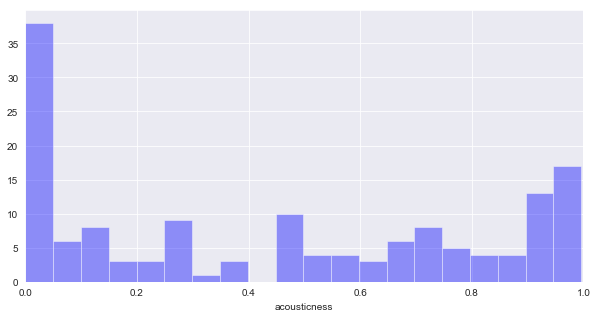

In [31]:
# Plotting the acousticness distribution

plt.figure(figsize=(10, 5))
sns.distplot(df['acousticness'], bins=20, color='blue', kde=False)
plt.xlim(0, 1)

From the plot above it looks like Four Tet's tracks vary evenly across the acoustice spectrum, with the exception of very unacoustic tracks being an extreme, with a majority of his tracks being considered highly unacoustic.

In [32]:
# I'm curious if there's a trend between albums and acousticness, so I will group by album, and find the 
# mean acousticness per album. I will also include the release_year, and sort the new dataframe by release_year

acousticness_by_album = df.groupby(['album', 'release_year'])['acousticness'].mean().reset_index()
acousticness_by_album.sort_values('release_year', inplace=True)
acousticness_by_album

,album,release_year,acousticness
5,Pause,2001,0.481049
8,Rounds,2003,0.368170
1,Everything Ecstatic,2005,0.274255
2,Everything Ecstatic Part 2,2006,0.417520
7,Ringer,2008,0.332033
10,There Is Love in You,2010,0.453179
6,Pink,2012,0.161399
0,Beautiful Rewind,2013,0.508401
3,Morning / Evening,2015,0.519000
4,New Energy,2017,0.782429


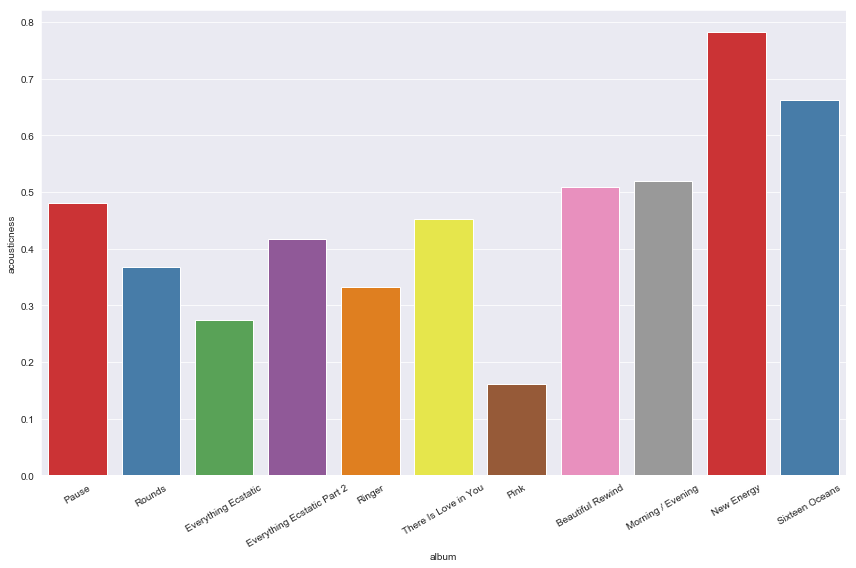

In [33]:
# Plotting the acousticness per album

plt.figure(figsize=(12, 8))
g = sns.barplot(x='album', y='acousticness', data=acousticness_by_album, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.tight_layout()

We can see an interesting trend here as on average Four Tet's last 4 albums have been his most acoustic pieces of work. His album New Energy which he released in 2017 is his most acoustic album which, if you've heard that album makes a lot of sense as he's got a lot of organic and acoustic elements in that album.

His first album was also one of his more acoustic albums on average. His album Pink which was released in 2012 was considered his least acoustic album which is something I find intersting as there are a decent amount of acoustic elements in that album. It's possible that the album was just very uncoventional in it's arrangement and added a lot of unqiue electronic elements that it was hard for the Spotify acoustic algorithm to determine it as a more acoustic album.

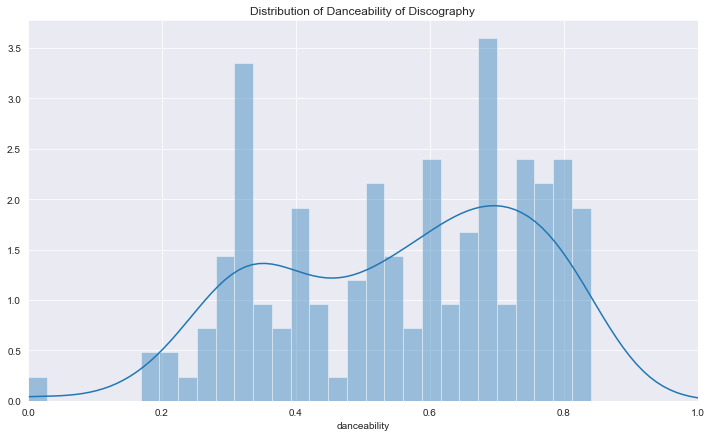

In [34]:
# Next I will look at the Danceability among Four Tet's albums. First I want to look at the distribution of 
# Danceability among his albums discography.

plt.figure(figsize=(12, 7))
sns.distplot(df['danceability'], bins=30)
plt.xlim(0, 1)
plt.title('Distribution of Danceability of Discography')
plt.show()

In [35]:
# Next I want to look at the danceability over albums, and sort ascending from album release year

danceability_by_album = df.groupby(['album', 'release_year'])['danceability'].mean().reset_index()
danceability_by_album.sort_values('release_year', inplace=True)
danceability_by_album

,album,release_year,danceability
5,Pause,2001,0.541818
8,Rounds,2003,0.536000
1,Everything Ecstatic,2005,0.540414
2,Everything Ecstatic Part 2,2006,0.409000
7,Ringer,2008,0.501500
10,There Is Love in You,2010,0.608167
6,Pink,2012,0.714875
0,Beautiful Rewind,2013,0.626727
3,Morning / Evening,2015,0.546500
4,New Energy,2017,0.514643


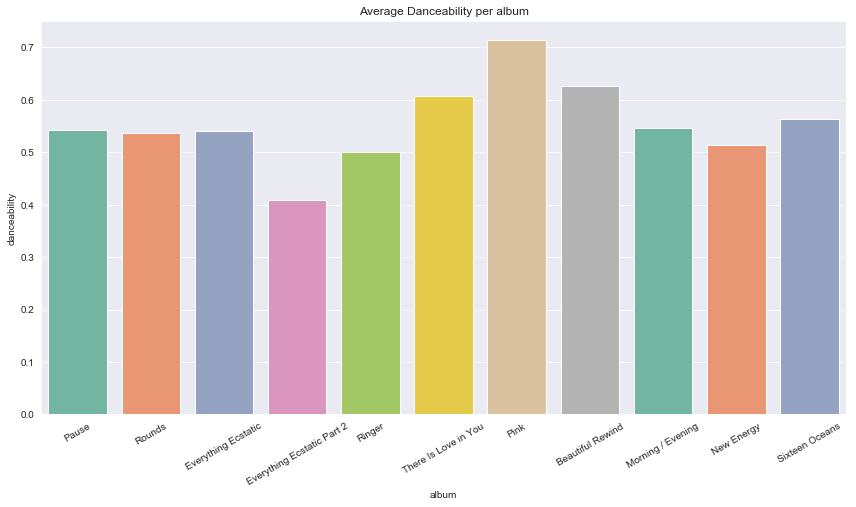

In [36]:
# Plotting the danceability of each album

plt.figure(figsize=(12, 7))
g = sns.barplot(x='album', y='danceability', data=danceability_by_album, palette='Set2')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.title('Average Danceability per album')
plt.show()

It looks like the average danceability amongst Four Tet's albums are relatively consistent, with exception to Everything Ecstatic Part 2, which is  denoted as his least danceable album on average. That being said it looks like the rest of his albums on average are considered more danceable albums with an average danceability greater than 0.5. A lot of his albums hover around 0.5 danceability though and this could be due to the diversity most of his albums have with a combination of dance and ambient tracks.

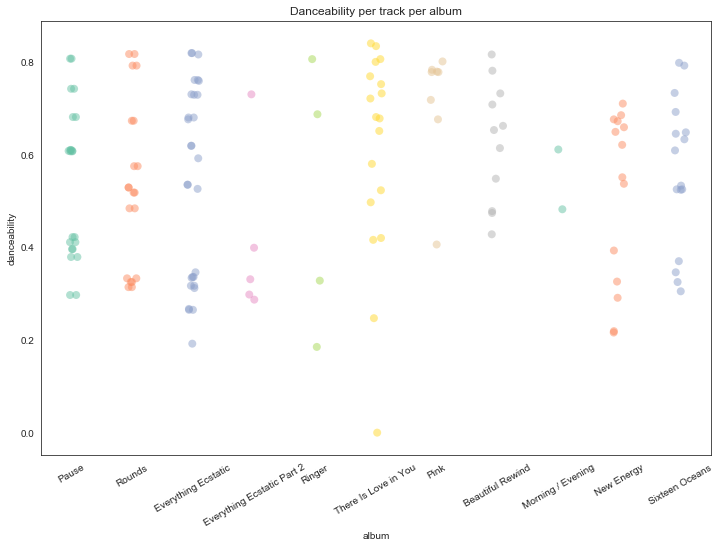

In [133]:
# Now I want to look at the danceability for tracks for each album
sns.set_style('white')

plt.figure(figsize=(12, 8))
g = sns.stripplot(x='album', y='danceability', data=df.sort_values('release_year')
                  , alpha=0.5, jitter=True, palette='Set2', size=8)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Danceability per track per album')
plt.show()

In [38]:
# From this it looks like There is Love in You has the track with the most danceability amongst all albums, 
# but also the track with the least danceability amongst all albums. I will double check here to confirm

df[(df['danceability'] == df['danceability'].max()) | (df['danceability'] == df['danceability']
                                                       .min())].sort_values('danceability', ascending=False)

,acousticness,album,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,valence,release_year
50,0.152,There Is Love in You,0.84,0.562,0.261,5,0.679,-9.745,1,sing,38,0.175,121.975,5,0.796,2010
49,0.996,There Is Love in You,0.00,0.642,0.883,11,0.220,-33.929,1,pablo's heart,0,0.000,0.000,4,0.000,2010


So interestingly both the most danceable track, and the least danceable track are borht on the 'There is Love in You' album. Something that's also interesting is that the track 'sing' which is the most danceable track has a very low acousticness, while the track 'pablo's heart' which is the least danceable track has an extremely high acousticness.

In [39]:
# I want to plot out 4 graphs with 2 graphs per row, and 2 graphs per column showing the top 10 percentile for
# acousticness and the top 10 percentile for danceability plotting the acousticness and danceability
# for both.

# First I will create dataframes of only the top 10 percentile of both acousticness and danceability

aq = np.percentile(df['acousticness'], 90)
dq = np.percentile(df['danceability'], 90)

top_10_p_acousticness = df[df['acousticness'] >= aq]
top_10_p_danceability = df[df['danceability'] >= dq]

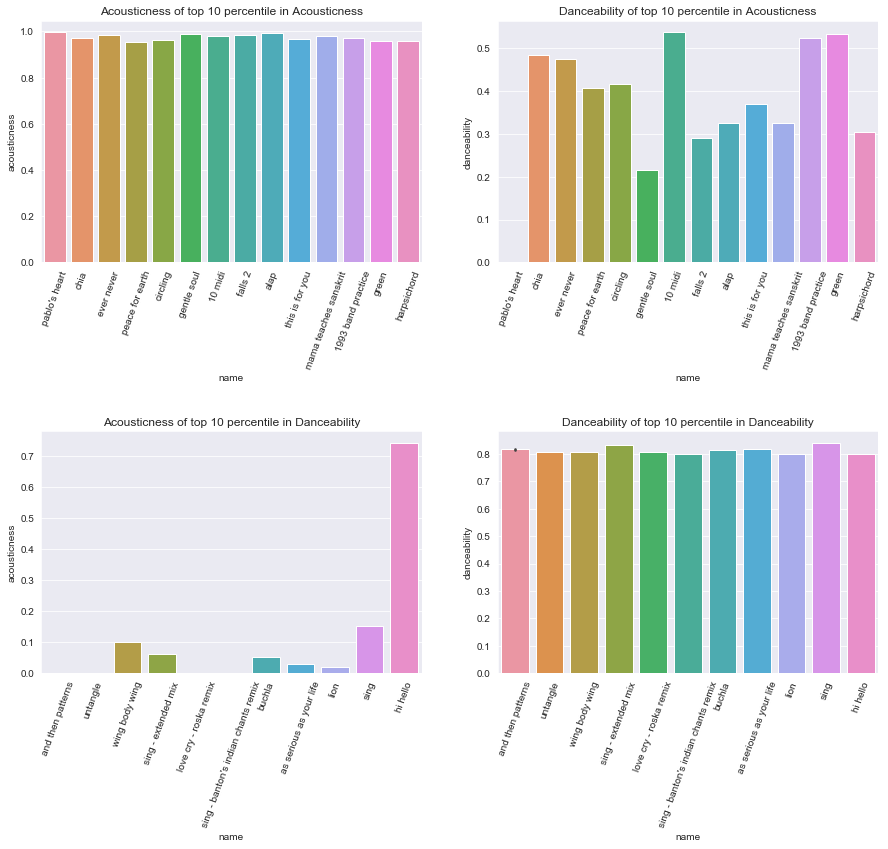

In [118]:
# Plotting them

plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
g = sns.barplot(x='name', y='acousticness', data=top_10_p_acousticness)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Acousticness of top 10 percentile in Acousticness')

plt.subplot(2, 2, 2)
g = sns.barplot(x='name', y='danceability', data=top_10_p_acousticness)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Danceability of top 10 percentile in Acousticness')

plt.subplot(2, 2, 3)
g = sns.barplot(x='name', y='acousticness', data=top_10_p_danceability)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Acousticness of top 10 percentile in Danceability')

plt.subplot(2, 2, 4)
g = sns.barplot(x='name', y='danceability', data=top_10_p_danceability)
g.set_xticklabels(g.get_xticklabels(), rotation=70)
plt.title('Danceability of top 10 percentile in Danceability')

plt.subplots_adjust(hspace=0.7)

plt.show()

It looks like the most acoustic tracks can still be very danceable tracks, although it varies from track to track. However it looks like the most danceable are extremely unacoustic with the exception of one track **hi hello**.

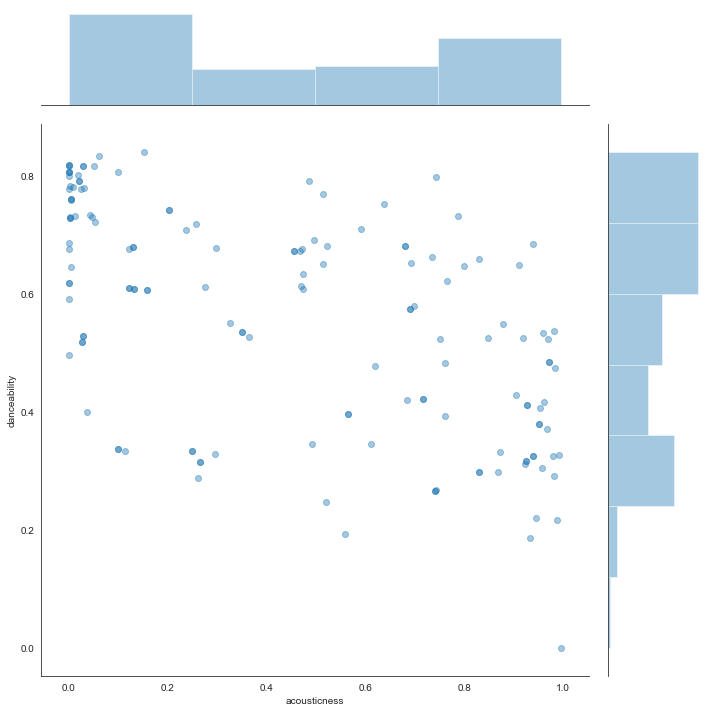

In [41]:
# To further investigate I am going to create a Joint Plot between acousticness and danceability

sns.jointplot(x='acousticness', y='danceability', data=df, height=10, alpha=0.4)

Overall it doesn't look like there's a clear cut relationship between acousticness and danceability as I originally might have thought.

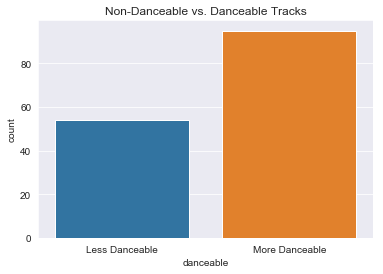

In [122]:
# Lastly with regards to danceability, I want to see the count of tracks that have above 0.5 danceability, vs.
# tracks that have below 0.5. I will make a new column with a 0 for all tracks under 0.5 and a 1 for all tracks
# above 0.5

danceability = df.copy()
danceability['danceable'] = df['danceability'].apply(lambda x: 'Less Danceable' if x < 0.5 else 'More Danceable')

sns.countplot(x='danceable', data=danceability)
plt.title('Non-Danceable vs. Danceable Tracks')
plt.show()

In [123]:
# Here I will calculate the percentage of Four Tet's that are considered danceable. My threshold for a track being
# danceable is above or equal to 0.5 in Spotify's danceability metric

round(100.0 * len(danceability[danceability['danceable'] == 'More Danceable'])/len(danceability), 2)

63.76

So from this it looks like more than half of Four Tet's tracks are considered More Danceable - roughly 64 percent of his tracks are considered to be more danceable.

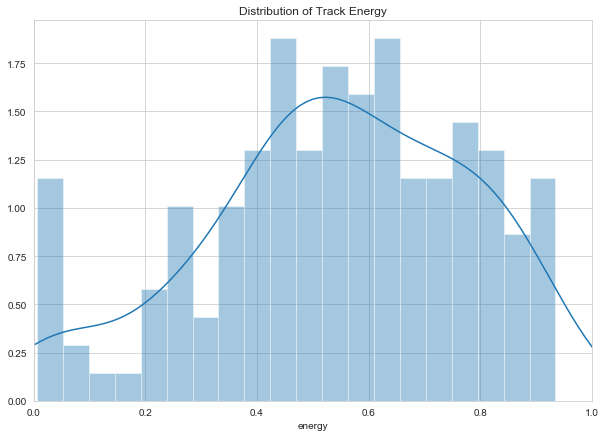

In [44]:
# Next I will look at the overall energy of Four Tet's discography. Plotting the distribution of energy here
sns.set_style('whitegrid')

plt.figure(figsize=(10, 7))
sns.distplot(df['energy'], bins=20)
plt.xlim(0, 1)
plt.title('Distribution of Track Energy')
plt.show()

In [45]:
# Grouping by album to see which album on average has the most energy

album_by_energy = df.groupby(['album', 'release_year'])['energy'].mean().reset_index()
album_by_energy.sort_values('release_year', inplace=True)
album_by_energy

,album,release_year,energy
5,Pause,2001,0.527727
8,Rounds,2003,0.587160
1,Everything Ecstatic,2005,0.567966
2,Everything Ecstatic Part 2,2006,0.645600
7,Ringer,2008,0.716000
10,There Is Love in You,2010,0.597889
6,Pink,2012,0.664000
0,Beautiful Rewind,2013,0.511155
3,Morning / Evening,2015,0.436500
4,New Energy,2017,0.391089


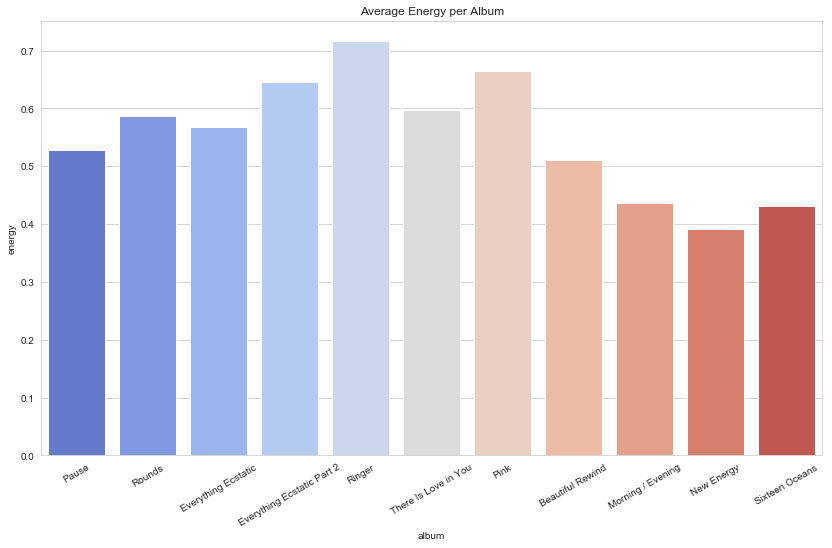

In [46]:
# Plotting average album energy

plt.figure(figsize=(14, 8))
g = sns.barplot(x='album', y='energy', data=album_by_energy, palette='coolwarm')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Average Energy per Album')
plt.show()

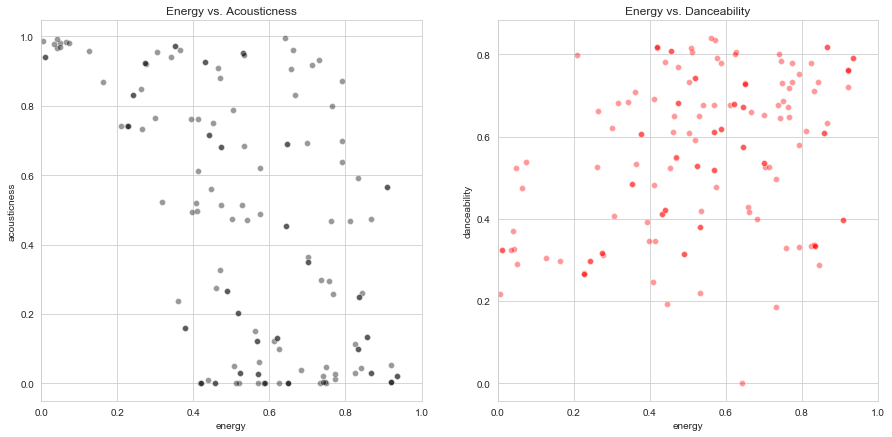

In [127]:
# Checking to see relationships between energy and acousticness, and energy and danceability

plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
sns.scatterplot(x='energy', y='acousticness', data=df, alpha=0.4, color='black')
plt.xlim(0, 1)
plt.title('Energy vs. Acousticness')

plt.subplot(1, 2, 2)
sns.scatterplot(x='energy', y='danceability', data=df, alpha=0.4, color='red')
plt.xlim(0, 1)
plt.title('Energy vs. Danceability')

plt.show()

It looks like there are clusters within both plots above that have somewhat of a relationship.
For example, in the energy vs. acousticness plot, there's a cluster of highly acoustic, lower energetic tracks, highly acoustic and highly energetic tracks, medium acoustic and high energy tracks, and low acoustic and high energy tracks

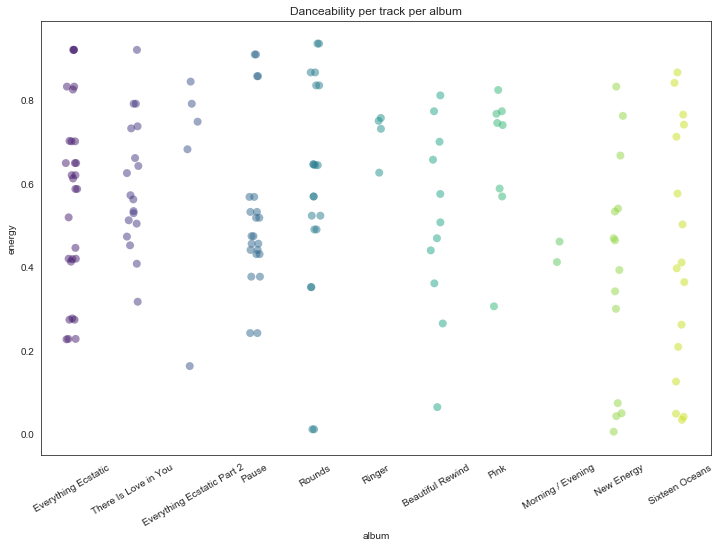

In [48]:
# Plotting the energy for each track on each album
sns.set_style('white')

plt.figure(figsize=(12, 8))
g = sns.stripplot(x='album', y='energy', data=df, alpha=0.5, jitter=True, palette='viridis', size=8)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.title('Danceability per track per album')
plt.show()

It looks like a majority of Four Tet's album have a widespread range of energy. His two lateset album Sixteen Oceans and New Energy have the biggest range when it comes to track energy. I don't see much of a trend in the change of his album's energy though, because the energy in his albums are all relatively consistent. His two latest albums do show that he has started to incorporate some more less energetic music into his albums, however he keeps the energy widespread through both albums.

In [49]:
# Looking at Four Tet's least energetic track, and his most energetic track

df[(df['energy'] == df['energy'].max()) | (df['energy'] == df['energy'].min())]

,acousticness,album,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,valence,release_year
12,0.0218,Rounds,0.792,0.93500,0.917,9,0.0615,-3.728,0,she moves she,29,0.0599,114.033,2,0.4730,2003
92,0.0218,Rounds,0.792,0.93500,0.917,9,0.0615,-3.728,0,she moves she,36,0.0599,114.033,2,0.4730,2003
148,0.9880,New Energy,0.216,0.00585,0.902,5,0.0916,-34.014,0,gentle soul,39,0.0485,94.024,13,0.0582,2017


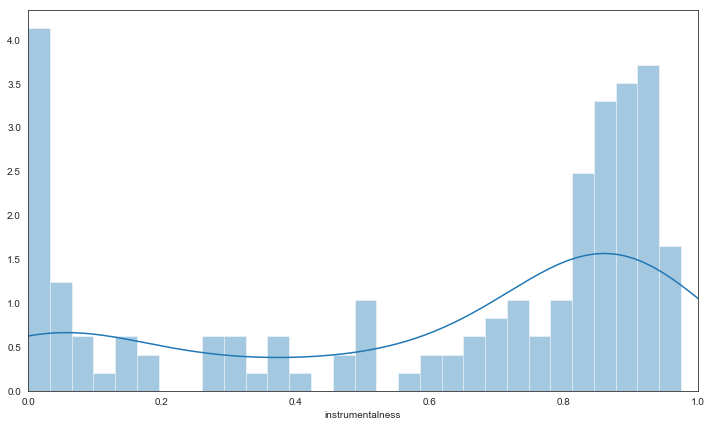

In [50]:
# Checking out the distribution of Instrumentalness across his albums

plt.figure(figsize=(12, 7))
sns.distplot(df['instrumentalness'], bins=30)
plt.xlim(0, 1)
plt.show()

As I anticipated, most of his tracks are highly instrumental, and contain very limited vocal content. It does look like a lot of his tracks are also considered to contain a lot of vocal content. I want to see how this varies per track over albums.

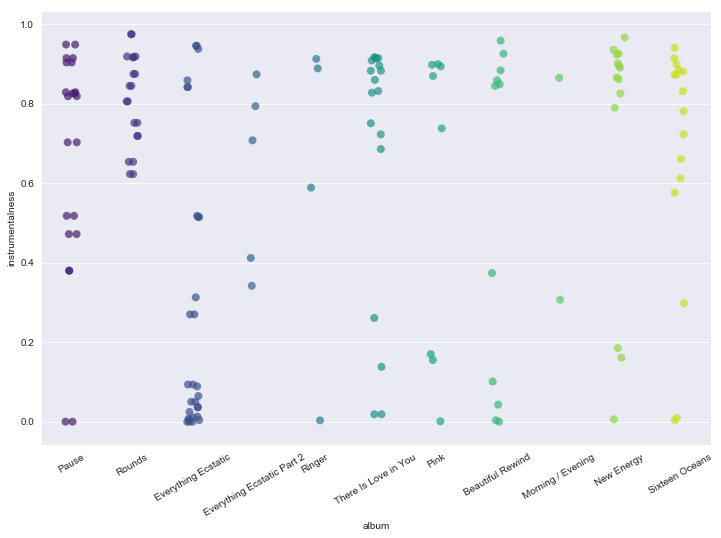

In [164]:
plt.figure(figsize=(12, 8))
g = sns.stripplot(x='album', y='instrumentalness', data=df.sort_values('release_year'), 
                  size=8, palette='viridis', alpha=0.7)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

I looks like the majority of Four Tet's music is highly instrumental with exception to his album 'Everything Ecstatic'. It looks like this album contained a lot of music with high vocal content. As his career has progressed though it would appear that his music became more instrumental based with limited amount of vocal content. His album 'Rounds' has only highly instrumental tracks. It would appear that for that album he focusued on more of a club style electonic beat heavy album.

In [52]:
# I am curious to check and see what keys most of Four Tet's music is in

df['key'].value_counts()

9     24
1     17
0     16
11    14
10    14
7     14
8     13
6     10
2     10
5      8
4      7
3      2
Name: key, dtype: int64

In [53]:
# Since there were no -1 values present for Key it looks like each key value was detected. Now I want to see how
# many track keys were in major vs. minor

df['mode'].value_counts()

1    89
0    60
Name: mode, dtype: int64

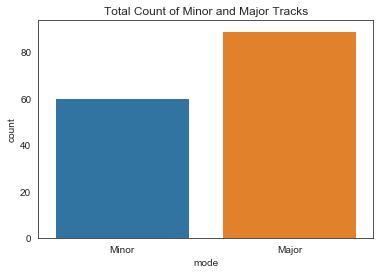

In [54]:
g=sns.countplot(x='mode', data=df)
g.set_xticklabels(['Minor', 'Major'])
plt.title('Total Count of Minor and Major Tracks')
plt.show()

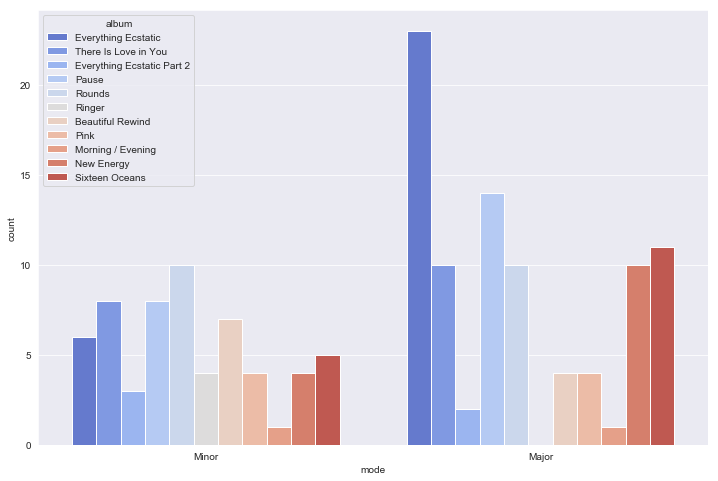

In [125]:
# So it looks like most of Four Tet's tracks were in Major keys. I want to see how that is reflected per album

plt.figure(figsize=(12, 8))
g=sns.countplot(x='mode', hue='album', data=df, palette='coolwarm')
g.set_xticklabels(['Minor', 'Major'])
plt.show()

In [56]:
# I want to see the actual keys and visualize what are the most frequent keys in his music, and per albums.
# I am going to create a function to add a column to df.

def key_and_mode(row):
    if row['key'] == 0 and row['mode'] == 1:
        return 'C-Major'
    elif row['key'] == 0 and row['mode'] == 0:
        return 'C-minor'
    elif row['key'] == 1 and row['mode'] == 1:
        return 'C#-Major'
    elif row['key'] == 1 and row['mode'] == 0:
        return 'C#-minor'
    elif row['key'] == 2 and row['mode'] == 1:
        return 'D-Major'
    elif row['key'] == 2 and row['mode'] == 0:
        return 'D-minor'
    elif row['key'] == 3 and row['mode'] == 1:
        return 'D#-Major'
    elif row['key'] == 3 and row['mode'] == 0:
        return 'D#-minor'
    elif row['key'] == 4 and row['mode'] == 1:
        return 'E-Major'
    elif row['key'] == 4 and row['mode'] == 0:
        return 'E-minor'
    elif row['key'] == 5 and row['mode'] == 1:
        return 'F-Major'
    elif row['key'] == 5 and row['mode'] == 0:
        return 'F-minor'
    elif row['key'] == 6 and row['mode'] == 1:
        return 'F#-Major'
    elif row['key'] == 6 and row['mode'] == 0:
        return 'F#-minor'
    elif row['key'] == 7 and row['mode'] == 1:
        return 'G-Major'
    elif row['key'] == 7 and row['mode'] == 0:
        return 'G-minor'
    elif row['key'] == 8 and row['mode'] == 1:
        return 'G#-Major'
    elif row['key'] == 8 and row['mode'] == 0:
        return 'G#-minor'
    elif row['key'] == 9 and row['mode'] == 1:
        return 'A-Major'
    elif row['key'] == 9 and row['mode'] == 0:
        return 'A-minor'
    elif row['key'] == 10 and row['mode'] == 1:
        return 'A#-Major'
    elif row['key'] == 10 and row['mode'] == 0:
        return 'A#-minor'
    elif row['key'] == 11 and row['mode'] == 1:
        return 'B-Major'
    elif row['key'] == 11 and row['mode'] == 0:
        return 'B-minor'

In [57]:
# Creating a new column to show the key and mode for each track

df['key_n_mode'] = df.apply(lambda row: key_and_mode(row), axis=1)

In [58]:
df.head()

,acousticness,album,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,valence,release_year,key_n_mode
108,0.612,Everything Ecstatic,0.346,0.413,0.00722,4,0.391,-25.803,0,fuji check,0,0.0667,79.387,3,0.0485,2005,E-minor
23,0.559,Everything Ecstatic,0.192,0.446,0.01270,7,0.392,-25.851,1,fuji check,0,0.0635,87.523,3,0.0510,2005,G-Major
49,0.996,There Is Love in You,0.000,0.642,0.88300,11,0.220,-33.929,1,pablo's heart,0,0.0000,0.000,4,0.0000,2010,B-Major
113,0.365,Everything Ecstatic,0.526,0.702,0.93800,6,0.718,-13.266,0,turtle turtle up,4,0.0605,76.028,8,0.6870,2005,F#-minor
110,0.922,Everything Ecstatic,0.312,0.277,0.00000,0,0.346,-12.708,1,clouding,4,0.0340,126.213,5,0.1020,2005,C-Major


In [59]:
# Looking at the value counts for each key_n_mode

df['key_n_mode'].value_counts()

A-Major     15
C-Major     14
C#-Major    12
G-Major     12
D-Major     10
A-minor      9
G#-Major     8
A#-minor     8
B-Major      7
E-minor      7
F-minor      7
B-minor      7
A#-Major     6
F#-minor     6
C#-minor     5
G#-minor     5
F#-Major     4
G-minor      2
C-minor      2
D#-minor     2
F-Major      1
Name: key_n_mode, dtype: int64

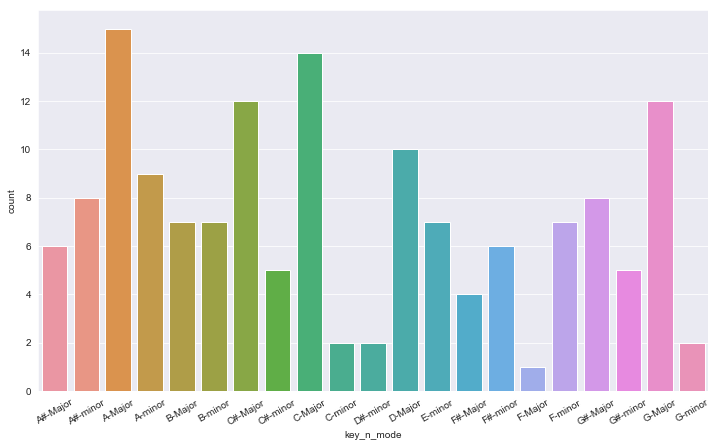

In [60]:
# Visualizing with a countplot
sns.set_style('darkgrid')

plt.figure(figsize=(12, 7))
g = sns.countplot(x='key_n_mode', data=df.sort_values('key_n_mode'))
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

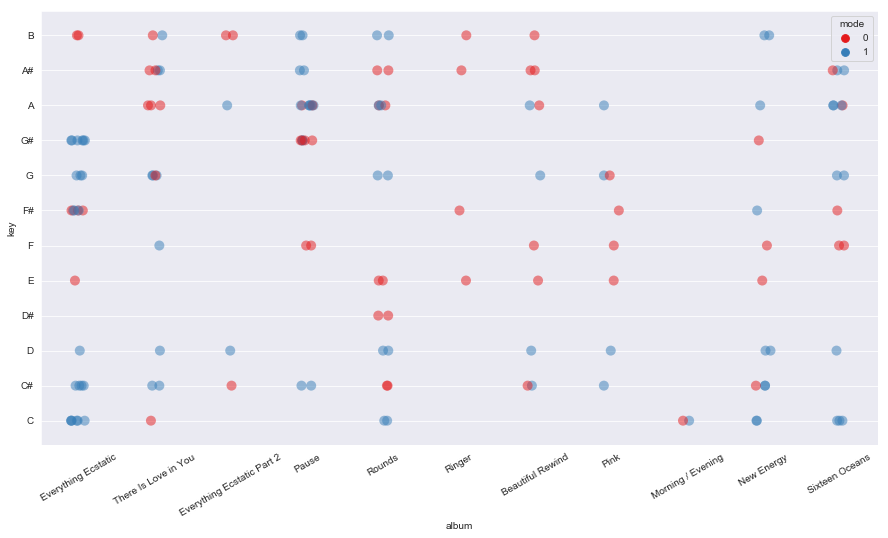

In [61]:
# Plotting out the different keys and modes per song for each album. The 0 is for a minor mode, and the 1 is major

plt.figure(figsize=(15, 8))
g=sns.stripplot(x='album', y='key', hue='mode', data=df, alpha=0.5, size=10, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.set_yticks(range(len(df['key'].unique())))
g.set_yticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.show()

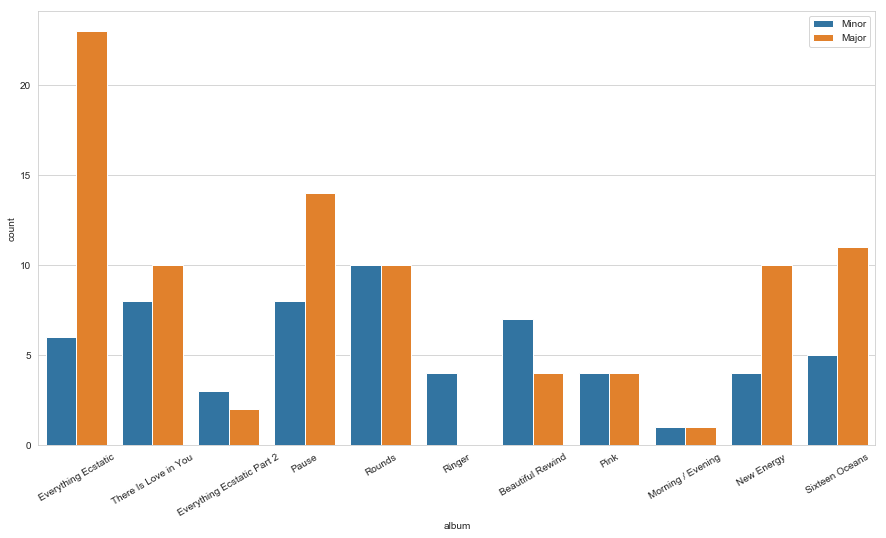

In [128]:
# Counting the amount of Major vs. Minor tracks per album

plt.figure(figsize=(15, 8))
g=sns.countplot(x='album', data=df, hue='mode')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.legend(['Minor', 'Major'])
plt.show()

Overall it looks like Four Tet's music spans between major and minor modes almost evenly with a slight edge to more major songs over minor. His two most recent album along with his first two albums and his album 'Pause' have a lot more tracks in the Major mode then the minor mode it would seem. He loves the keys C-major, and A-major, however D-major and E-minor are on almost every single album. Something intersting to note is one his two track album 'Morning / Evening' both tracks are in the key C, with one track being C-major, and the other track being C-minor.

His album Rounds which has low vocal content and one that I presumed to be a more club style album has an even amount of minor mode tracks and major mode tracks. I would've expected it to have more minor mode tracks. With exception to his albums 'Ringer' and 'Everything Ecstatic Part 2' all of his albums are either evenly spread between major and minor tracks, or favor major tracks.

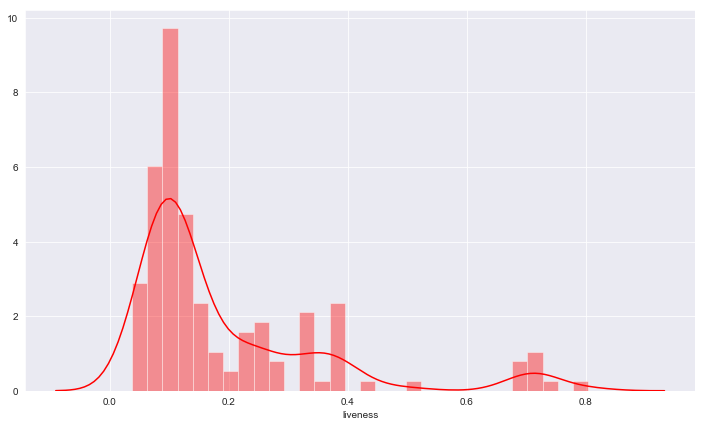

In [63]:
# Next I will look at the overall Liveness of Four Tet's discography. Here I am plotting the distribution of
# liveness

plt.figure(figsize=(12,7))
sns.distplot(df['liveness'], bins=30, color='red')

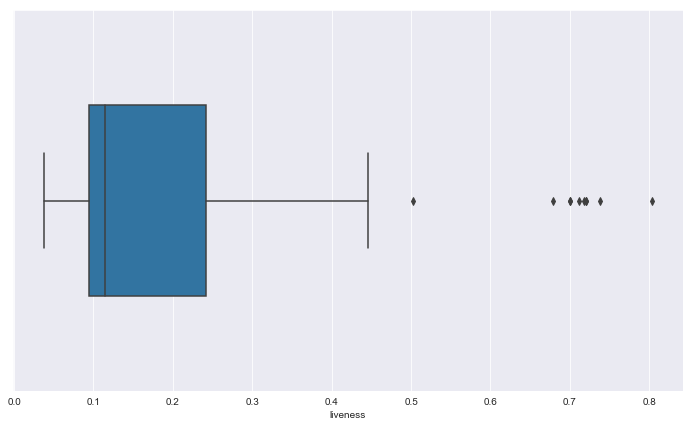

In [64]:
# It looks like the majority of his tracks are not preformed live as anticipated. I will look at a boxplot to
# further investigate this

plt.figure(figsize=(12, 7))
sns.boxplot(df['liveness'], orient='h', width=0.5)
plt.show()

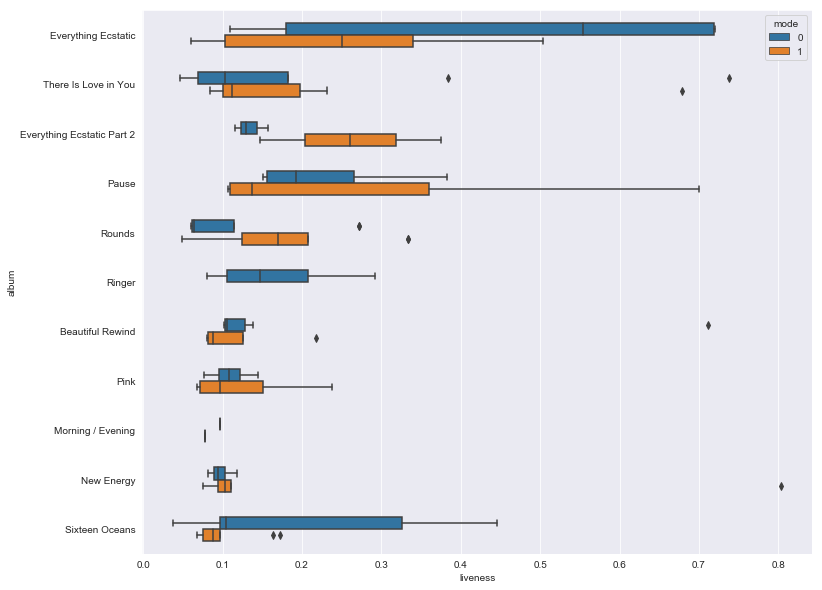

In [65]:
# I want to look at the boxplot distributions of liveness for each album with a hue of Major vs. Minor mode tracks.

plt.figure(figsize=(12, 10))
sns.boxplot(y='album', x='liveness', data=df, orient='h', width=0.5, hue='mode')
plt.show()

Based off of our distribution plot and boxplot it looks like the large majority of Four Tet's tracks lie between the 0.1 - 0.25 range of track liveness. The outliers could be due to certain samples he used that contain a live audience atmosphere or element. It also looks like the majority of his Liveness in his albums are minor tracks, with 'Everything Ecstatic' and 'Sixteen Oceans' containing the largest range of Minor mode liveness, and 'Everything Ecstatic' and 'Pause' containing the largest range of Major mode liveness. It looks like on average most Minor mode tracks have very little Liveness in their tracks with exception to the tracks on the 'Everything Ecstatic' album.

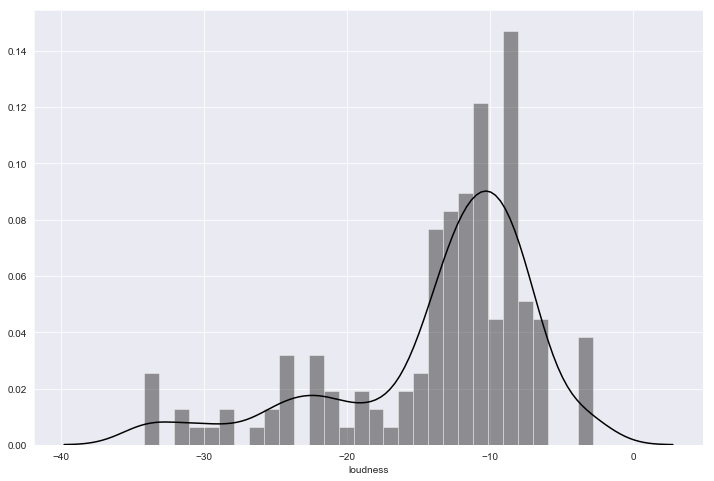

In [66]:
# Looking at loudness next. Plotting the loudness distribution here across all tracks

plt.figure(figsize=(12, 8))
sns.distplot(df['loudness'], bins=30, color='black')

In [67]:
loudness = df.groupby(['album', 'release_year'])['loudness'].mean().reset_index()
loudness.sort_values('release_year', inplace=True)
loudness

,album,release_year,loudness
5,Pause,2001,-13.015545
8,Rounds,2003,-11.278200
1,Everything Ecstatic,2005,-12.512966
2,Everything Ecstatic Part 2,2006,-11.849600
7,Ringer,2008,-11.573750
10,There Is Love in You,2010,-12.738944
6,Pink,2012,-12.660375
0,Beautiful Rewind,2013,-15.389727
3,Morning / Evening,2015,-14.081500
4,New Energy,2017,-16.704643


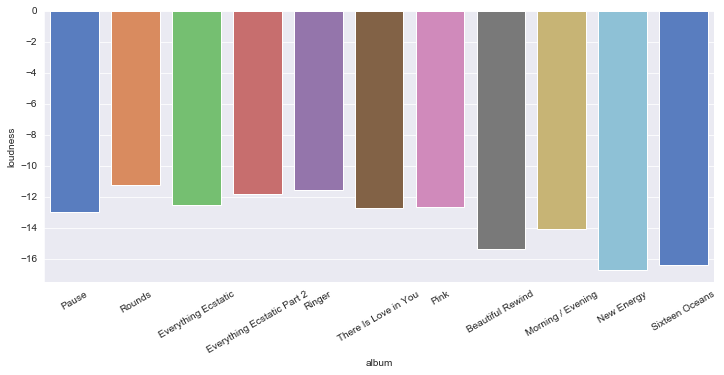

In [68]:
# Checking the average Loudness per album

plt.figure(figsize=(12, 5))
g=sns.barplot(x='album', y='loudness', data=loudness, palette='muted')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

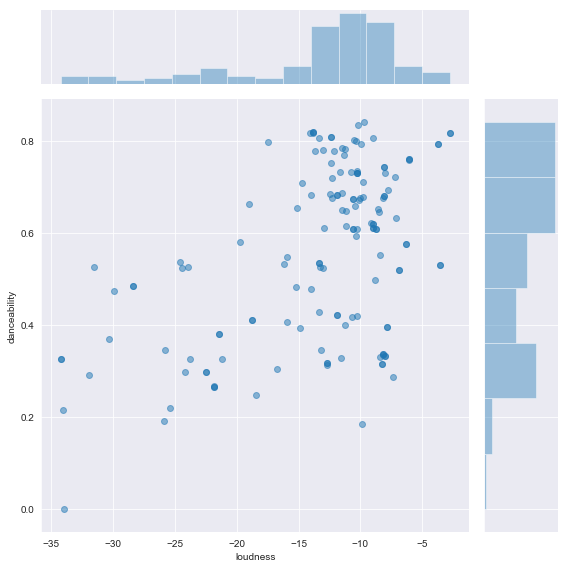

In [69]:
# Plotting Loudness vs. Danceability

sns.jointplot(x='loudness', y='danceability', data=df, alpha=0.5, height=8)

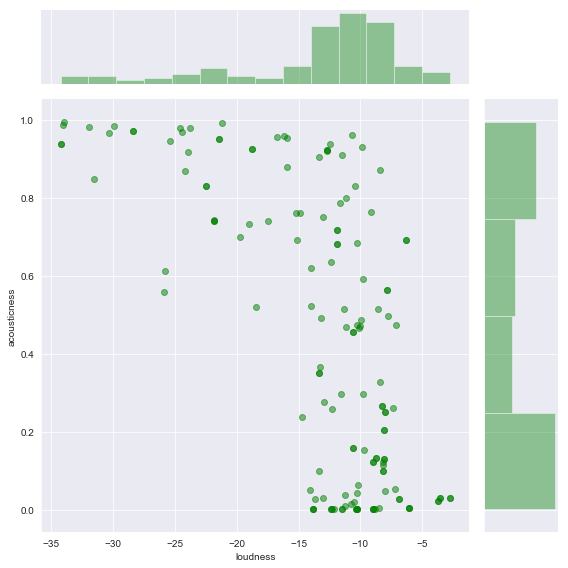

In [70]:
# Plotting loudness vs. acousticness

sns.jointplot(x='loudness', y='acousticness', data=df, alpha=0.5, height=8, color='green')

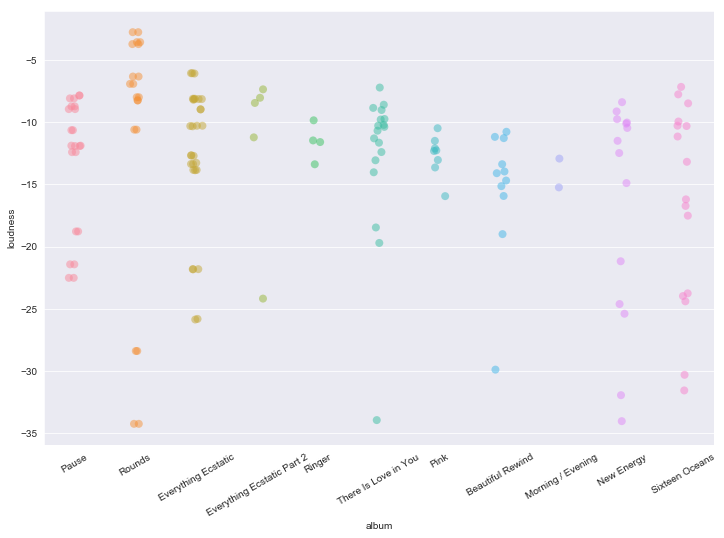

In [131]:
plt.figure(figsize=(12, 8))
g=sns.stripplot(x='album', y='loudness', data=df.sort_values('release_year'), size=8, alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

An interesting insight from the loudness attributes is that on average Four Tet's last 4 albums are his quietest, with his last two albums being the quietest albums he's ever released on average. I find that interesting that his earlier albums are his loudest albums on average because with the advancement of audio engineering music is becoming louder and louder, so I would've anticipated that his latest albums were his loudest on average, not the quietest. He definitely has more quieter tracks on his recent two albums than on any other album he released, with exception to 'Rounds'. However with 'New Energy' and 'Sixteen Oceans' he has more tracks that that fall below his average threshold of track loudness. It could be because these albums are his most acoustic, and he elected for a more organic feel by keeping the dynamic range intact on a majority of the tracks, and compensated loudness for organicness. These albums also had the lowest energy out of all of his albums - this could be due in part to the more acousticness of these albums and organic feel, or it could be in part because of the quietness of the albums.

In [72]:
# Next I will look at the popularity of his tracks. First I want to find the most popular and least popular tracks.

df[(df['popularity'] == df['popularity'].
    max()) | (df['popularity'] == df['popularity'].min())].sort_values('popularity', ascending=False)

,acousticness,album,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,valence,release_year,key_n_mode
137,0.327,New Energy,0.551,0.469,0.16100,2,0.0939,-8.393,1,two thousand and seventeen,64,0.0296,75.495,2,0.4980,2017,D-Major
108,0.612,Everything Ecstatic,0.346,0.413,0.00722,4,0.3910,-25.803,0,fuji check,0,0.0667,79.387,3,0.0485,2005,E-minor
23,0.559,Everything Ecstatic,0.192,0.446,0.01270,7,0.3920,-25.851,1,fuji check,0,0.0635,87.523,3,0.0510,2005,G-Major
49,0.996,There Is Love in You,0.000,0.642,0.88300,11,0.2200,-33.929,1,pablo's heart,0,0.0000,0.000,4,0.0000,2010,B-Major


In [73]:
# I want to look at the average popularity based on album

popularity_by_album = df.groupby(['album', 'release_year'])['popularity'].mean().reset_index()
popularity_by_album.sort_values('release_year', inplace=True)
popularity_by_album

,album,release_year,popularity
5,Pause,2001,21.590909
8,Rounds,2003,28.600000
1,Everything Ecstatic,2005,11.724138
2,Everything Ecstatic Part 2,2006,8.800000
7,Ringer,2008,24.750000
10,There Is Love in You,2010,29.388889
6,Pink,2012,36.625000
0,Beautiful Rewind,2013,32.545455
3,Morning / Evening,2015,34.500000
4,New Energy,2017,47.214286


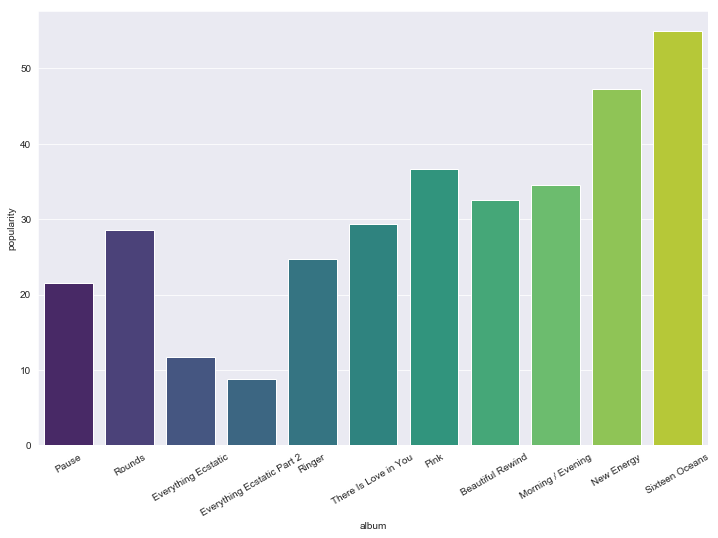

In [74]:
# Plotting the average popularity per album

plt.figure(figsize=(12, 8))
g=sns.barplot(x='album', y='popularity', data=popularity_by_album, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

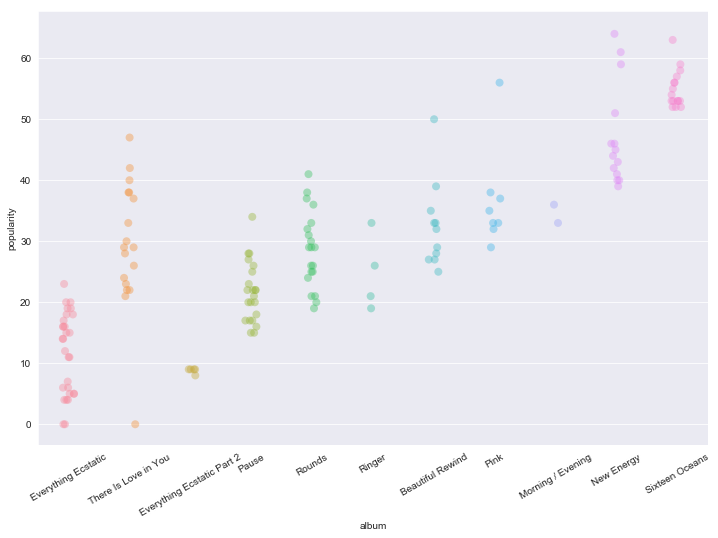

In [75]:
# Plotting track popularity for each album

plt.figure(figsize=(12, 8))
g=sns.stripplot(x='album', y='popularity', data=df, size=8, alpha=0.4)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

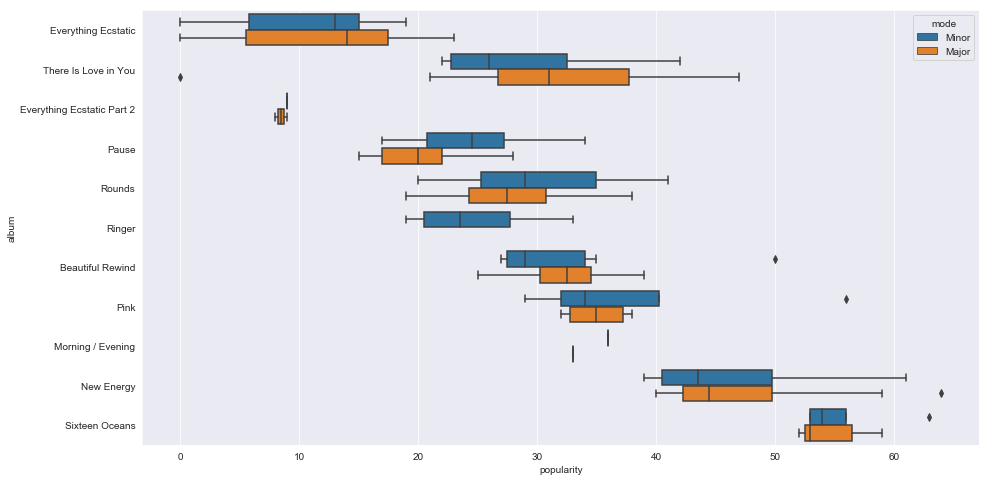

In [159]:
# I am curious to see if there's a disparity between popularity and track mode
sns.set_style('darkgrid')

plt.figure(figsize=(15, 8))
g=sns.boxplot(x='popularity', y='album', data=df, hue='mode', )
legend = g.legend_
new_labels = ['Minor', 'Major']
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)
plt.show()

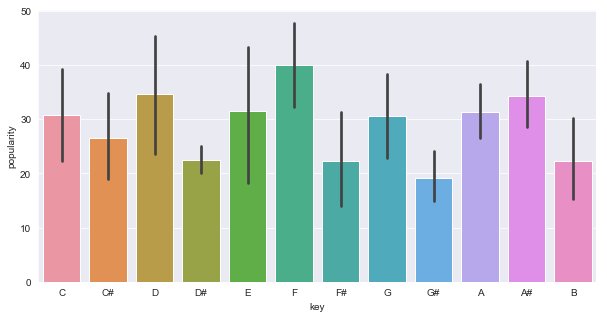

In [77]:
# I'm also curious to see if there's any one musical key that has a higher popularity than others

plt.figure(figsize=(10, 5))
g=sns.barplot(x='key', y='popularity', data=df,)
g.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.show()

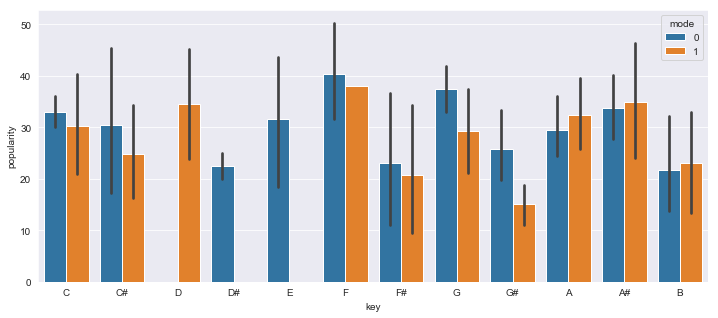

In [78]:
# I also want to see what the most popular key_n_modes were. I can use the plot above and just separate by 'mode' hue

plt.figure(figsize=(12, 5))
g=sns.barplot(x='key', y='popularity', data=df, hue='mode')
g.set_xticklabels(['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B'])
plt.show()

In [79]:
# I want to look at the audio features correlation with popularity
# Creating a dataframe to measure each features correlation with the 'popularity' feature

popularity_corr = df.corr()['popularity'].reset_index()
popularity_corr

,index,popularity
0,acousticness,0.206545
1,danceability,0.217457
2,energy,-0.090031
3,instrumentalness,0.201440
4,key,-0.058127
5,liveness,-0.271600
6,loudness,0.002794
7,mode,-0.051889
8,popularity,1.000000
9,speechiness,-0.065963


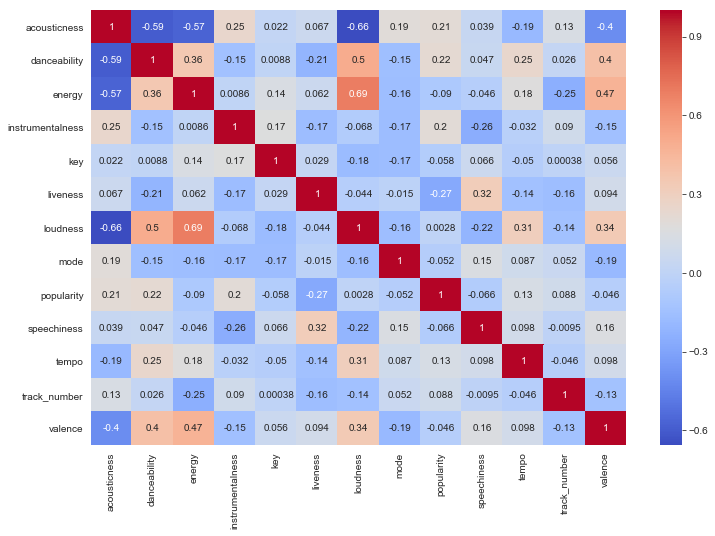

In [80]:
# Plotting a heatmap to see the correlation across the dataframe features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

As anticipated the most popular albums on average are Four Tet's recent albums 'Sixteen Oceans' and 'New Energy'. His least popular albums on average are his fourth album 'Everything Ecstatic Part 2', and third album 'Everything Ecstatic'. Popularity is partially based off of the most recent plays, so it's no surprise that his latest albums are on average the most popular as they probably have been getting the most recent plays being that they are his newest releases. 'Everything Ecstatic' has two tracks that were rated a 0 popularity, and have the most tracks that fall below 20 in populairty (almost all the tracks on the album). When investigating popularity based on mode, it looks like the distributions for each album are pretty even on a popularity scale when comparing Minor to Major mode tracks. When comparing keys it looks like F-Major and F-Minor were the most popular Major and Minor keys, however the distribution was pretty even amongst keys, which leads me to believe that song key isn't a big influence on song popularity. Upon further investigation it looks like acousticness has the largest correlation to song popularity, but it is only a correlation of 0.26 which is not large at all, and is probably only due to the fact that Four Tet's lateset albums are highly acoustic, and are his most popular albums because they are his most recent releases. The track 'Two Thousand and Seventeen' is his most popular track off of his album 'New Energy'. I have a feeling this is in some part due to the Spotify algorithm pushing it to the first track under his profile.

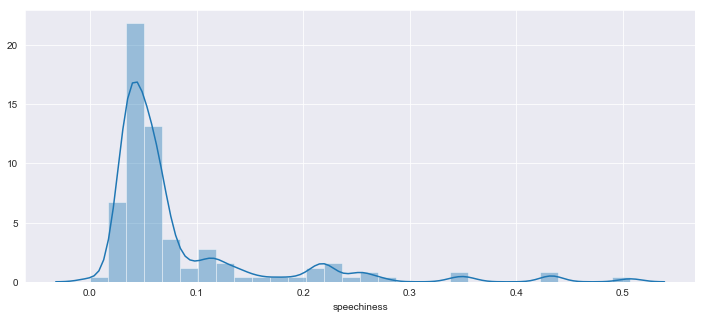

In [81]:
# I anticipate that the speechiness on Four Tet's tracks will be very low, so I will plot the distribution

plt.figure(figsize=(12, 5))
sns.distplot(df['speechiness'], bins=30)

As anticipated most of his tracks fall between 0.0 and 0.1 on the speechiness scale, and his tracks don't go above 0.5 on the scale.

In [82]:
# I want to view the distribution of his track tempo's. I'm curious to see what's his most frequently used tempo.
# For this plot I want to use plotly.

import plotly
import cufflinks as cf
cf.go_offline()

df['tempo'].iplot(kind='hist', xTitle='Tempo', yTitle='Count', bins=50)

In [83]:
# It's strange to see that he has one track that's lower than 3 bpm, and 2 tracks above 190. I want to further 
# investigate these

df[(df['tempo'] <= 0) | (df['tempo'] > 190)]

,acousticness,album,danceability,energy,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,track_number,valence,release_year,key_n_mode
49,0.996,There Is Love in You,0.000,0.642,0.883,11,0.2200,-33.929,1,pablo's heart,0,0.0000,0.000,4,0.0000,2010,B-Major
58,0.684,There Is Love in You,0.420,0.534,0.832,1,0.1090,-10.279,1,love cry - joy orbison remix,29,0.2240,202.081,13,0.0930,2010,C#-Major
78,0.475,Sixteen Oceans,0.633,0.866,0.723,7,0.0955,-7.166,1,teenage birdsong,58,0.0558,195.986,4,0.0625,2020,G-Major


In [84]:
# Upon further investigation the track 'Teenage Birdsong' is listed as 98 bpm, and 'Love Cry Joy Orbison remix' is
# listed as 132 bpm, so I will update both in the dataframe.

df.at[58,'tempo'] = 132
df.at[78, 'tempo'] = 98

In [85]:
# The track "Pablo's Heart" turned out to be a field recording that was only 12 seconds long, hence the inability
# to define a tempo, thus calling the tempo 0. I will remove this instance.

new_df = df[df['tempo'] > 0]

In [86]:
# I will replot the distribution based on the new_df

new_df['tempo'].iplot(kind='hist', xTitle='Tempo', yTitle='Count', bins=50, colors='green')

From the distribution above it looks like Four Tet knows no bounds when it comes to track tempo's. It really shows his versatility as an artist. While he most frequently creates tracks between 125-130 bpm, he has quite a few releases within the 70-100 bpm range. The large portion of his tracks being between 115-140 bpm make sense due to the fact that about 64% of his tracks are considered danceable, and electronic club music usually falls between 115-140 bpm

The lower bpms are most likely his ambient and acoustic songs. I am curious to see if on average his two most recent albums have lower bpms. I would also be curious to map out danceability vs. tempo.

In [87]:
# Looking at average tempo's over albums

album_tempo_average = new_df.groupby(['album', 'release_year'])['tempo'].mean().reset_index()
album_tempo_average.sort_values('release_year', inplace=True)
album_tempo_average

,album,release_year,tempo
5,Pause,2001,110.340909
8,Rounds,2003,103.776100
1,Everything Ecstatic,2005,115.410379
2,Everything Ecstatic Part 2,2006,126.549800
7,Ringer,2008,124.266500
10,There Is Love in You,2010,126.986412
6,Pink,2012,126.611875
0,Beautiful Rewind,2013,124.305727
3,Morning / Evening,2015,123.533500
4,New Energy,2017,105.720643


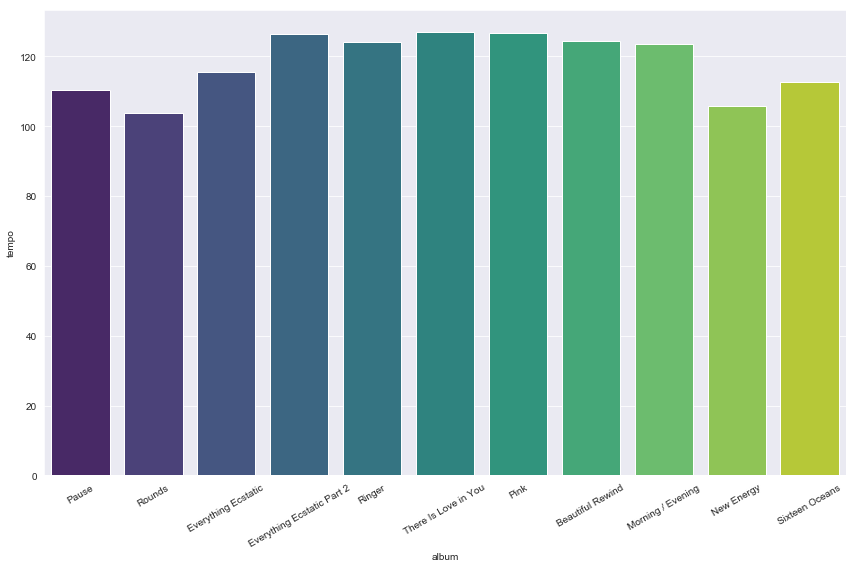

In [88]:
plt.figure(figsize=(12, 8))
g=sns.barplot(x='album', y='tempo', data=album_tempo_average, palette='viridis')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.tight_layout()
plt.show()

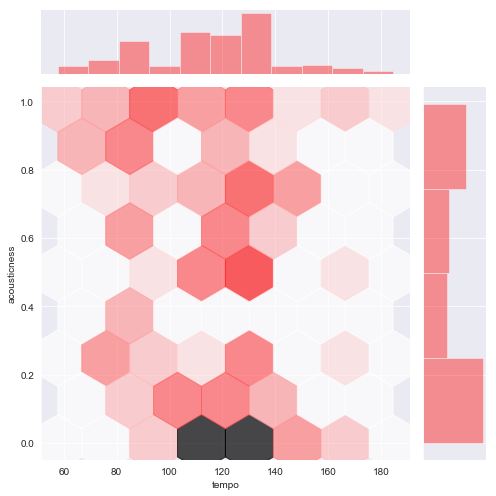

In [89]:
# Plotting a jointplot of acousticness vs. tempo

sns.jointplot(x='tempo', y='acousticness', data=new_df, kind='hex', color='red', height=7, alpha=0.7)

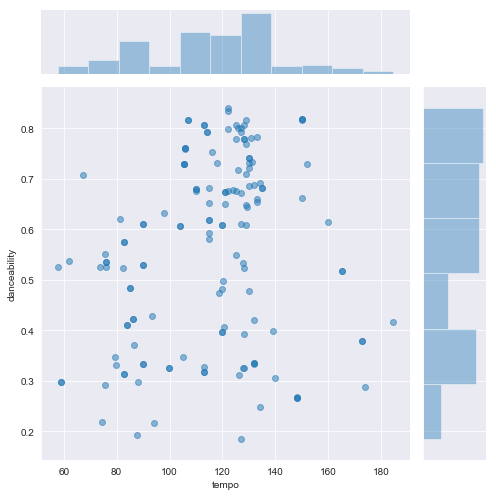

In [90]:
# Plotting a jointplot between tempo and danceability

sns.jointplot(x='tempo', y='danceability', data=new_df, height=7, alpha=0.5)

It looks like there might be a small relationship between acousticness and tempo and danceability and tempo, but nothing major that pops out. When looking at the correlation heatmap there's around a 0.2 correlation for both relationships which isn't that strong of a relationship. That being said, on average the album with the second lowest tempo was 'New Energy' which also happened to be the most acoustic album, but otherwise the average album tempos all fell between 110-125 with exception to 'Rounds' which had the lowest average tempo.

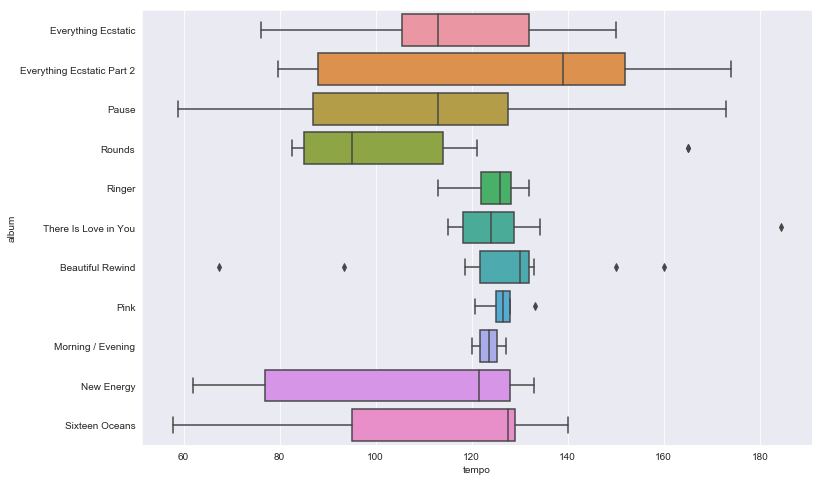

In [91]:
# I'm curious to look at the tempo distributions over albums. I will plot some boxplots to see that.

plt.figure(figsize=(12, 8))
sns.boxplot(x='tempo', y='album', data=new_df)

It looks like his earlier albums and his two recent albums had the widest tempo distribution range. Maybe that's an indicator along with the high acoustic levels of his recent two albums that he's starting to create more diverse albums, and potentially incorporating a certain style to tracks that was more prevalent in his earlier album releases. His album Beautiful Rewind seems to have quite a few outliers, with his remaining albums have a much smaller range of tempos.

In [92]:
# I want to see how many tracks in the album Beautiful Rewind are between 100 and 140 bpm

len(new_df[(new_df['album'] == 'Beautiful Rewind') & (new_df['tempo'].between(100, 140))])

7

In [93]:
# The last feature I want to explore is 'valence'. Here I will plot the distribution of valence using plotly.

df['valence'].iplot(kind='hist', xTitle='Valence', yTitle='Count', colors='black', bins=50)

What's interesting is that a large portion of his tracks are considered extremely sad. I would have actually expected the opposite, especially since he has more Major tracks than Minor tracks. His music does have a melancholy-ness to it, so perhaps this is why he has a lot of songs that have a very low valence. Otherwise like many other attributes the valence of his discography is truly spread out across the spectrum. It does seem though that there are more tracks  that are on the lower side of the valence spectrum.

In [94]:
# I want to plot the average valence over his albums

average_album_valence = df.groupby(['album', 'release_year'])['valence'].mean().reset_index()
average_album_valence.sort_values('release_year', inplace=True)
average_album_valence

,album,release_year,valence
5,Pause,2001,0.372527
8,Rounds,2003,0.366130
1,Everything Ecstatic,2005,0.400534
2,Everything Ecstatic Part 2,2006,0.481600
7,Ringer,2008,0.462725
10,There Is Love in You,2010,0.378622
6,Pink,2012,0.375600
0,Beautiful Rewind,2013,0.414100
3,Morning / Evening,2015,0.177500
4,New Energy,2017,0.293286


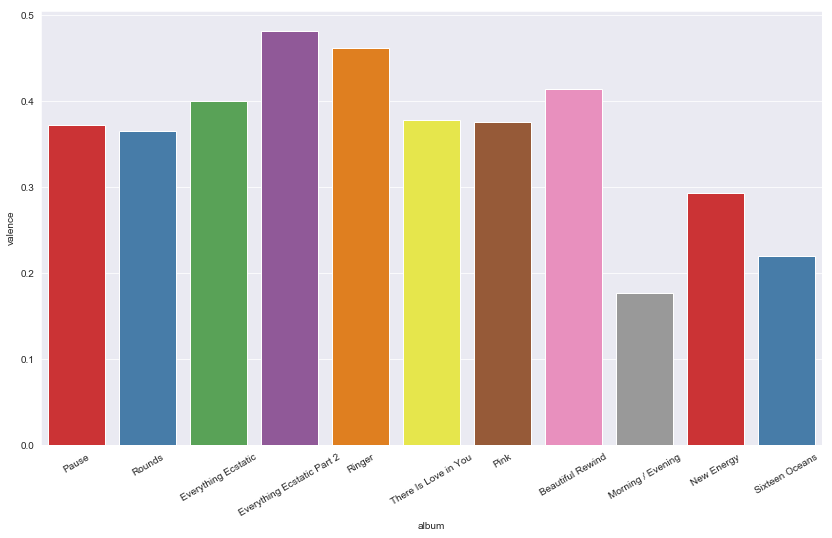

In [95]:
plt.figure(figsize=(14, 8))
g=sns.barplot(x='album', y='valence', data=average_album_valence, palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

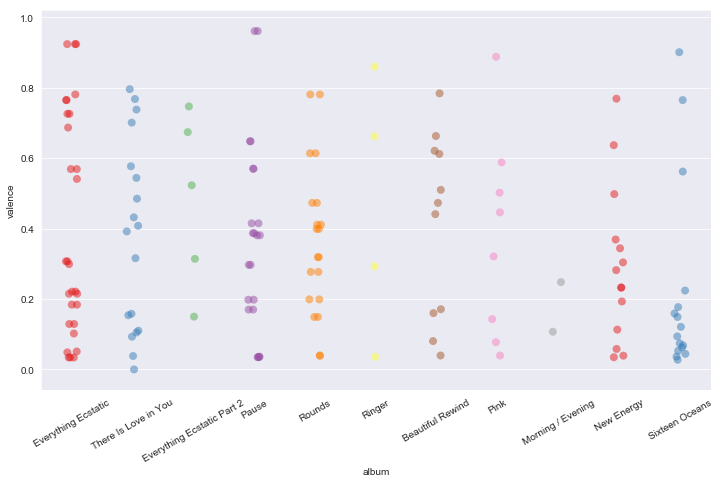

In [96]:
# I also want to look at where each track falls on the valence spectrum per album

plt.figure(figsize=(12, 7))
g=sns.stripplot(x='album', y='valence', data=df, palette='Set1', size=8, alpha=0.5)
g.set_xticklabels(g.get_xticklabels(), rotation=30)
plt.show()

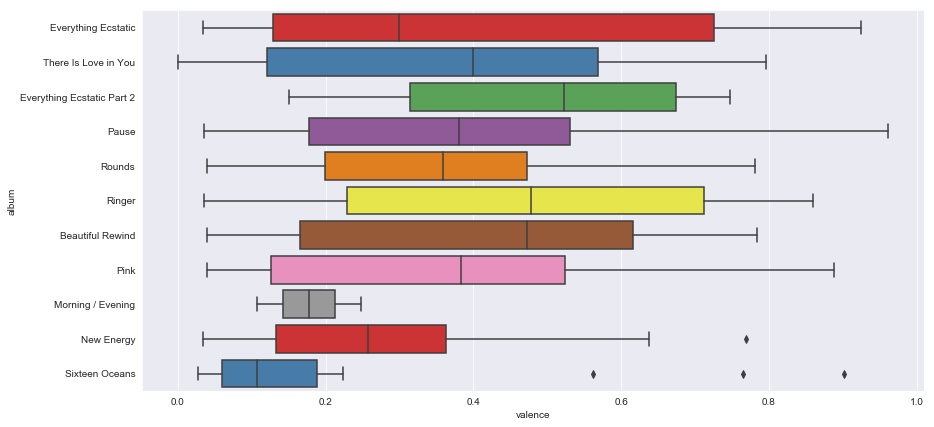

In [140]:
# Plotting the distribution of valence over albums

plt.figure(figsize=(14, 7))
sns.boxplot(y='album', x='valence', data=df, palette='Set1')
plt.show()

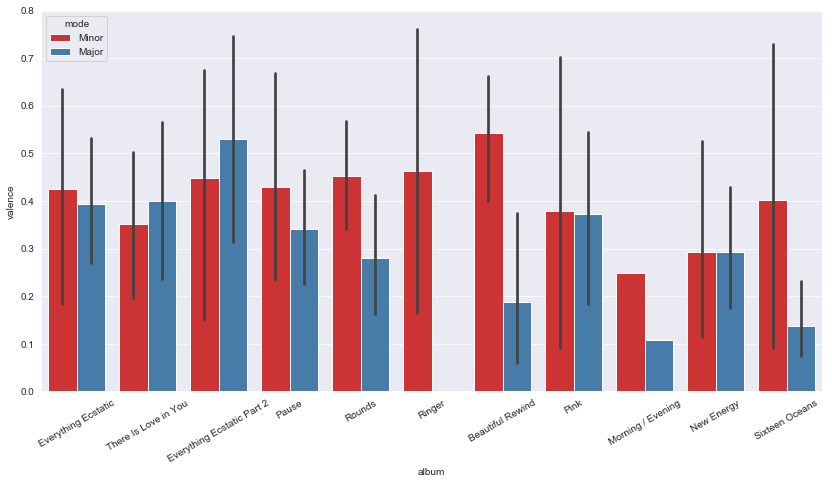

In [160]:
# Plotting the average valence score over albums based on mode

plt.figure(figsize=(14, 7))
g=sns.barplot(x='album', y='valence', data=df, hue='mode', palette='Set1')
g.set_xticklabels(g.get_xticklabels(), rotation=30)
legend = g.legend_
new_labels = ['Minor', 'Major']
for t, l in zip(legend.texts, new_labels): 
    t.set_text(l)
plt.show()

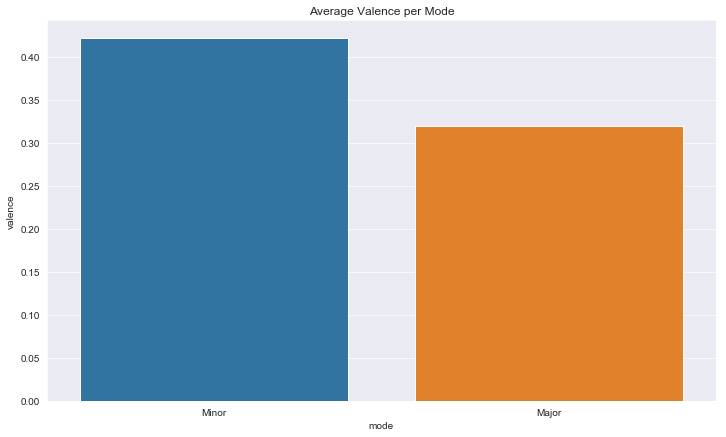

In [163]:
# Plotting the average valence per mode

average_valence_by_mode = df.groupby('mode')['valence'].mean().reset_index()

plt.figure(figsize=(12, 7))
g=sns.barplot(x='mode', y='valence', data=average_valence_by_mode)
g.set_xticklabels(['Minor', 'Major'])
plt.title('Average Valence per Mode')
plt.show()

It looks like his 3 most recent album releases all fall more on the sadder/ melancholy side. This further shows that his music has gone from being less clubby and more melancholoy, ambient and acoustic. The distribution of his most recent album Sixteen Oceans falls primarily between 0 and 0.25 on the valence scale with 3 major outliers. The overall distribution of his tracks filling the spectrum of valence is also evident in the majority of his albums as they range consistently from very low valence tracks to very high valence. It furhter confirms his versatility as an artist, and further proves why his sound is so unique and so distinguishable.

## Building a model

After performing a lot of EDA on the dataset built off of the Spotify Audio Features metrics, I want to see if I can build a model that can predict a 'Four Tet style' songs' popularity based off of the Audio Features metrics I have.

In [98]:
# Setting up the variables

X = new_df[['acousticness', 'danceability', 'energy', 'instrumentalness', 'key',
                          'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'valence']].values
y = new_df['popularity'].values

In [99]:
# Importing train_test_split

from sklearn.model_selection import train_test_split

In [100]:
# Creating train and test variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=104)

In [101]:
# Importing MinMaxScaler and creating an object for it

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [102]:
# Scaling and transforming the X_train and X_test data

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [103]:
# Importing Sequential, Dense, Dropout and EarlyStopping

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [104]:
# Building the model

model = Sequential()

model.add(Dense(11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [105]:
# Creating an early stop

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [106]:
# Fitting the model

model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=200, callbacks=[early_stop])

Train on 103 samples, validate on 45 samples
Epoch 1/200
103/103 [==============================] - 1s 9ms/sample - loss: 1184.5792 - val_loss: 882.9671
Epoch 2/200
103/103 [==============================] - 0s 225us/sample - loss: 1184.0178 - val_loss: 880.6155
Epoch 3/200
103/103 [==============================] - 0s 267us/sample - loss: 1179.9855 - val_loss: 878.4478
Epoch 4/200
103/103 [==============================] - 0s 217us/sample - loss: 1178.5038 - val_loss: 876.4987
Epoch 5/200
103/103 [==============================] - 0s 236us/sample - loss: 1173.7722 - val_loss: 874.6441
Epoch 6/200
103/103 [==============================] - 0s 220us/sample - loss: 1172.6396 - val_loss: 873.0138
Epoch 7/200
103/103 [==============================] - 0s 260us/sample - loss: 1169.9815 - val_loss: 871.6654
Epoch 8/200
103/103 [==============================] - 0s 272us/sample - loss: 1168.7265 - val_loss: 870.4245
Epoch 9/200
103/103 [==============================] - 0s 265us/sample - loss

103/103 [==============================] - 0s 308us/sample - loss: 604.1094 - val_loss: 299.9470
Epoch 75/200
103/103 [==============================] - 0s 325us/sample - loss: 671.3341 - val_loss: 285.6300
Epoch 76/200
103/103 [==============================] - 0s 355us/sample - loss: 611.2610 - val_loss: 273.1983
Epoch 77/200
103/103 [==============================] - 0s 304us/sample - loss: 642.8557 - val_loss: 263.1108
Epoch 78/200
103/103 [==============================] - 0s 268us/sample - loss: 592.6279 - val_loss: 255.6951
Epoch 79/200
103/103 [==============================] - 0s 264us/sample - loss: 665.4621 - val_loss: 249.3850
Epoch 80/200
103/103 [==============================] - 0s 249us/sample - loss: 625.6535 - val_loss: 244.2795
Epoch 81/200
103/103 [==============================] - 0s 225us/sample - loss: 601.4693 - val_loss: 241.4462
Epoch 82/200
103/103 [==============================] - 0s 218us/sample - loss: 678.1562 - val_loss: 238.8882
Epoch 83/200
103/103 [=

103/103 [==============================] - 0s 305us/sample - loss: 582.2522 - val_loss: 223.9467
Epoch 149/200
103/103 [==============================] - 0s 247us/sample - loss: 558.4374 - val_loss: 223.8427
Epoch 150/200
103/103 [==============================] - 0s 258us/sample - loss: 643.8702 - val_loss: 224.6067
Epoch 151/200
103/103 [==============================] - 0s 216us/sample - loss: 650.5520 - val_loss: 224.3600
Epoch 152/200
103/103 [==============================] - 0s 262us/sample - loss: 534.9614 - val_loss: 223.9286
Epoch 153/200
103/103 [==============================] - 0s 217us/sample - loss: 453.8015 - val_loss: 221.9271
Epoch 154/200
103/103 [==============================] - 0s 251us/sample - loss: 611.3819 - val_loss: 220.0854
Epoch 155/200
103/103 [==============================] - 0s 327us/sample - loss: 675.2275 - val_loss: 219.6905
Epoch 156/200
103/103 [==============================] - 0s 338us/sample - loss: 559.8207 - val_loss: 220.5063
Epoch 157/200
1

In [107]:
# Putting the loss values throughout the model training into a dataframe

losses = pd.DataFrame(model.history.history)

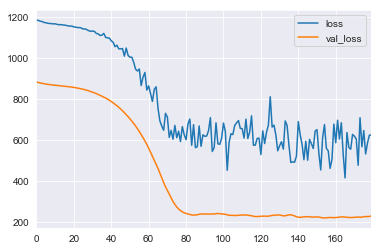

In [108]:
# Plotting the losses 

losses.plot()

In [109]:
# Importing mean_squared_error, and mean_absolute_error to evaluate the model

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [110]:
# Creating predictions from the X_test_scaled data

predictions = model.predict(X_test_scaled)

In [111]:
# Evaluation the model by calculating the mean_squared_error, mean_absolute_error, and root_mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

In [112]:
print('Mean Absolute Error: {}'.format(mae))
print('Root Mean Squared Error: {}'.format(rmse))
print('Mean Squared Error: {}'.format(mse))

Mean Absolute Error: 11.3508282132
Root Mean Squared Error: 15.1294257331
Mean Squared Error: 228.899523014


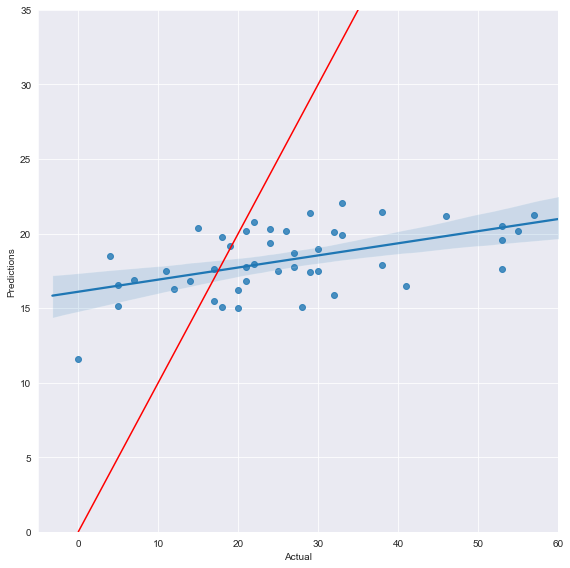

In [113]:
# Plotting the Predictions vs. the Actual with a red line that shows were a perfect models predictions would be.
# The blue line reflects the linear line of the model's precitions vs. the actual popularity level

results = pd.DataFrame(predictions, columns=['Predictions'])
results['Actual'] = y_test

x = np.linspace(0, 60, 100)
y = x

sns.lmplot(x= 'Actual', y='Predictions', data=results, height=8)
plt.plot(x, y, color='r')
plt.xlim(-5, 60)
plt.ylim(0, 35)
plt.show()